In [ ]:
# Import essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Ignore warnings (optional)
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [5]:
# Load the dataset
df = pd.read_csv("/content/winequality-white.csv", delimiter=';')  # Use ';' as separator since the dataset uses it

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5   

In [6]:
# Show dataset information
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None

Missing Values in Dataset:
fixed acidity           0
volatile acidity        0
citric acid        

In [14]:
# Basic statistics of the dataset
print("Dataset Statistics:")
print(df.describe())

Dataset Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000          

In [15]:
# Check for missing values
print("🔍 Checking for missing values...\n")
print(df.isnull().sum())  # Count missing values per column
print("\nTotal missing values:", df.isnull().sum().sum())

🔍 Checking for missing values...

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Total missing values: 0


In [16]:
# Check for duplicate rows
print("\n🔍 Checking for duplicate rows...")
duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")


🔍 Checking for duplicate rows...
Total duplicate rows: 937


In [17]:
df = df.drop_duplicates()
print(f"Dataset shape after removing duplicates: {df.shape}")

Dataset shape after removing duplicates: (3961, 12)


In [18]:
print(f"Total duplicate rows after removal: {df.duplicated().sum()}")

Total duplicate rows after removal: 0


In [19]:
# Display dataset shape
print(f"\n🔍 Dataset Shape: {df.shape}")  # Rows & columns count


🔍 Dataset Shape: (3961, 12)


In [20]:
# Check data types of each column
print("\n🔍 Data Types of Columns:")
print(df.dtypes)


🔍 Data Types of Columns:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [21]:
# Summary statistics
print("\n🔍 Summary Statistics:")
print(df.describe())


🔍 Summary Statistics:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000       

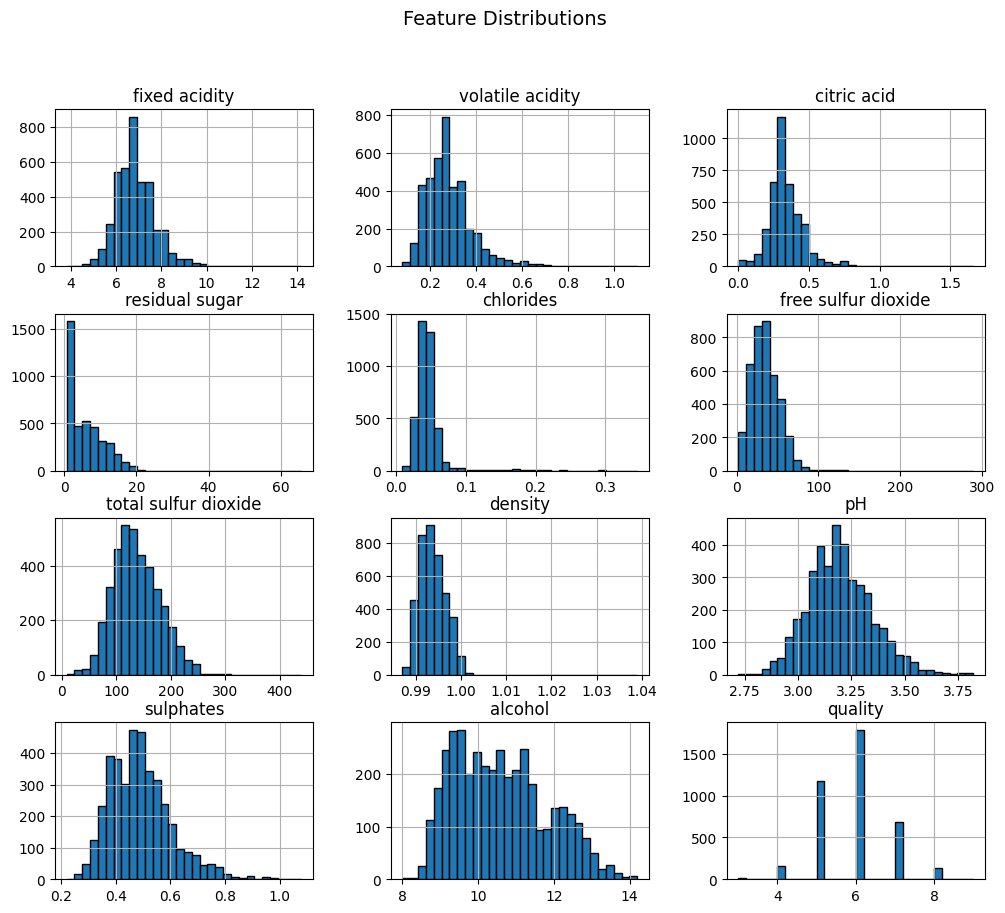

In [22]:
# Visualize distribution of each numerical feature
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

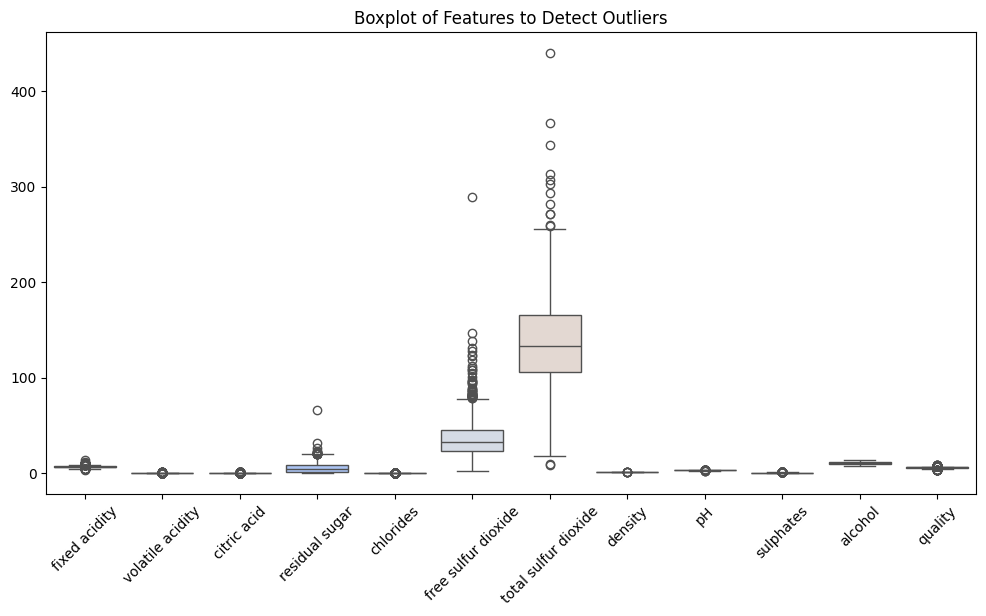

In [23]:
# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Boxplot of Features to Detect Outliers")
plt.show()

In [25]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)  # 25th percentile
    Q3 = data[feature].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers.shape[0]

# Check outliers for each numerical column
outlier_counts = {col: detect_outliers_iqr(df, col) for col in df.columns if col != 'quality'}
print("Outliers detected per feature:\n", outlier_counts)

Outliers detected per feature:
 {'fixed acidity': 106, 'volatile acidity': 133, 'citric acid': 223, 'residual sugar': 16, 'chlorides': 178, 'free sulfur dioxide': 44, 'total sulfur dioxide': 14, 'density': 6, 'pH': 46, 'sulphates': 96, 'alcohol': 0}


In [26]:
def remove_outliers_iqr(data, features):
    for feature in features:
        Q1 = data[feature].quantile(0.25)  # 25th percentile
        Q3 = data[feature].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
    return data

# List of numerical features to clean
features_to_clean = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                     'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                     'pH', 'sulphates']

# Remove outliers
df_cleaned = remove_outliers_iqr(df, features_to_clean)

# Print dataset shape after outlier removal
print(f"Dataset shape after outlier removal: {df_cleaned.shape}")

Dataset shape after outlier removal: (3207, 12)


In [27]:
# Check again for outliers
outlier_counts = {col: detect_outliers_iqr(df_cleaned, col) for col in features_to_clean}
print("Outliers detected per feature after removal:\n", outlier_counts)

Outliers detected per feature after removal:
 {'fixed acidity': 0, 'volatile acidity': 22, 'citric acid': 56, 'residual sugar': 0, 'chlorides': 8, 'free sulfur dioxide': 0, 'total sulfur dioxide': 0, 'density': 0, 'pH': 9, 'sulphates': 40}


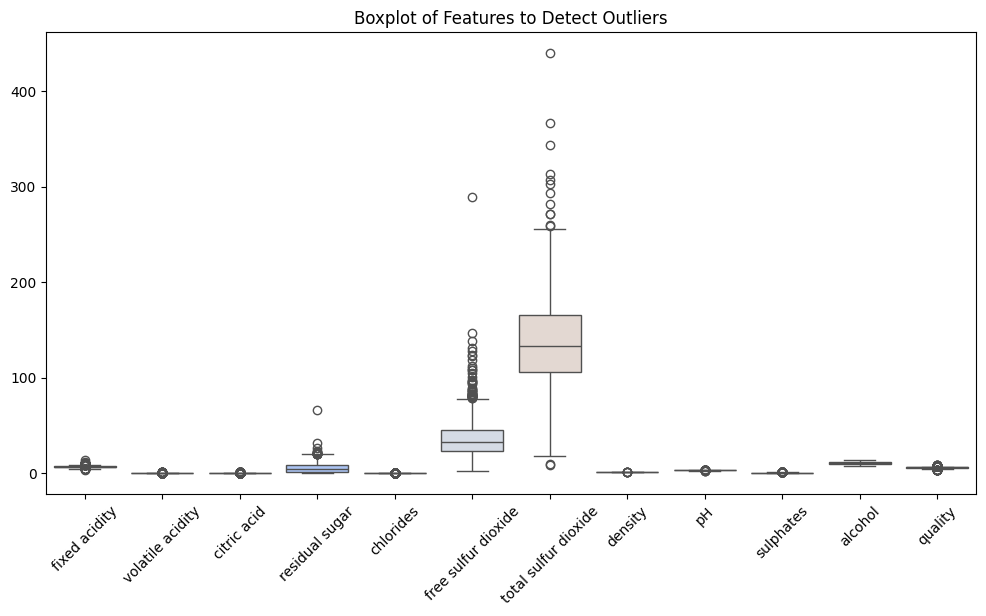

In [28]:
# Boxplot to detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Boxplot of Features to Detect Outliers")
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to all features except the target variable ('quality')
scaled_features = scaler.fit_transform(df_cleaned.iloc[:, :-1])  # Exclude last column (target)

# Convert back to DataFrame with original column names
df_scaled = pd.DataFrame(scaled_features, columns=df_cleaned.columns[:-1])

# Add the target column back
df_scaled['quality'] = df_cleaned['quality'].values

# Display the first few rows
print(df_scaled.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.654437          0.459584     0.177863       -0.915917   0.715165   
1       1.734310          0.197990     0.880048        0.249561   0.815855   
2       0.539936         -0.455995    -0.056198        0.601404   1.621381   
3      -0.787145          0.721179    -1.928691        0.271551   0.312402   
4       1.734310         -0.586793     1.231140       -0.937907   0.211711   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -1.346913             -0.075598  0.163961  0.733747   0.081294   
1            -0.283533             -0.928157  0.567526  0.446447  -0.424155   
2             0.846309              1.239778  0.750965 -0.056327  -0.828513   
3            -0.283533              0.021837  0.494151 -0.128152  -0.120885   
4            -0.416455             -0.148675  0.090586  0.159148  -0.323065   

    alcohol  quality  
0 -0.993513        6  
1 -0.48858

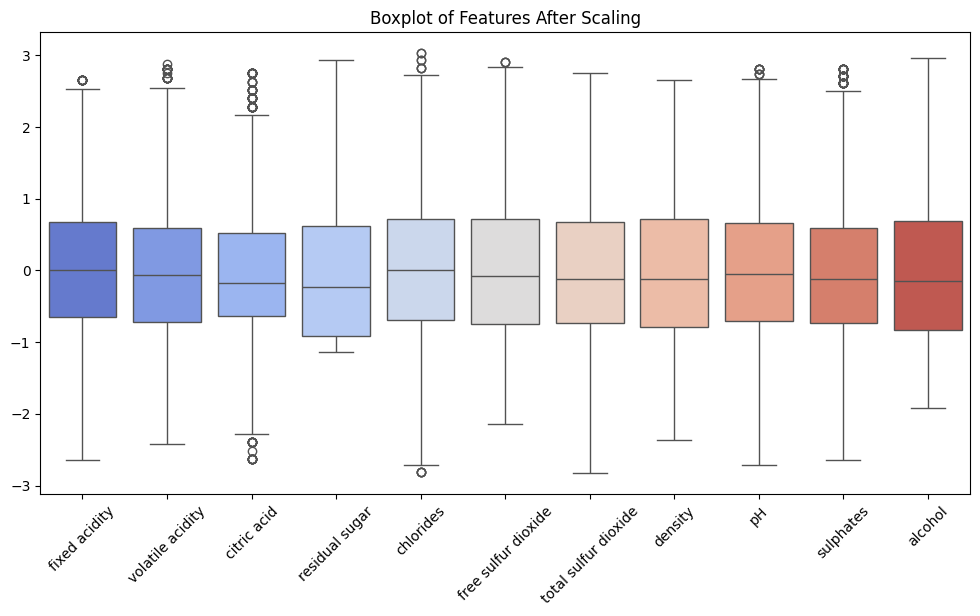

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled.iloc[:, :-1], palette="coolwarm")  # Exclude target column
plt.xticks(rotation=45)
plt.title("Boxplot of Features After Scaling")
plt.show()

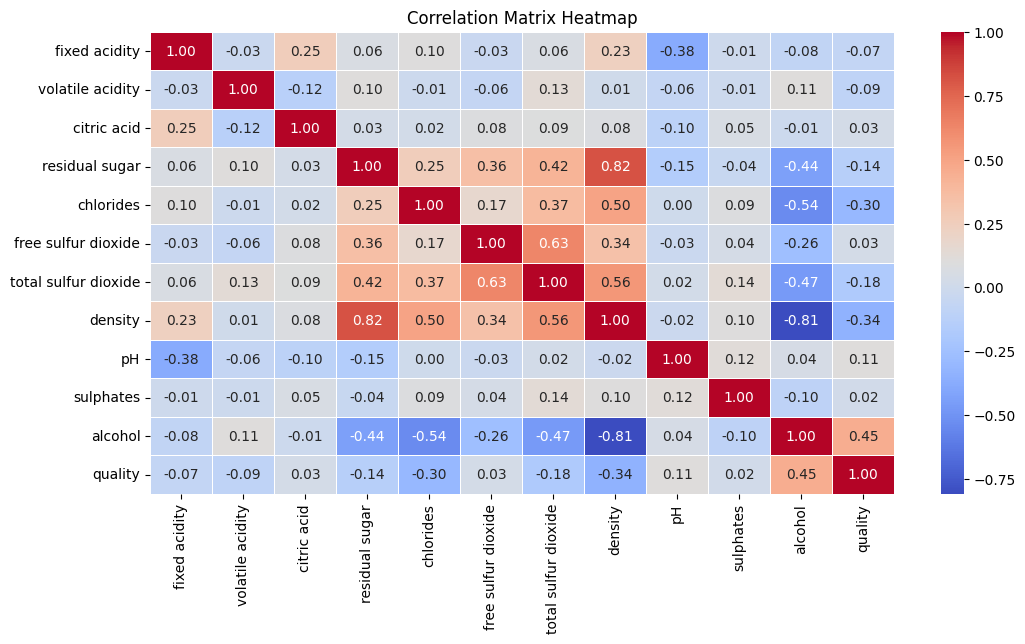

In [32]:
# Compute correlation matrix
corr_matrix = df_scaled.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [33]:
# Highly correlated features:

# density and residual sugar (0.82) → More sugar = Higher density.
# total sulfur dioxide and free sulfur dioxide (0.63) → As free SO₂ increases, total SO₂ also increases.
# chlorides and density (0.50) → More chlorides = Higher density.
# Negative correlations:

# density and alcohol (-0.81) → Higher alcohol content = Lower density.
# residual sugar and alcohol (-0.44) → Wines with higher sugar tend to have lower alcohol.
# Features affecting wine quality:

# alcohol (0.45) has the strongest positive correlation → More alcohol = Higher quality.
# density (-0.34) and chlorides (-0.30) have negative correlations → Higher density or chlorides = Lower quality.

In [34]:
# Declare feature vector and target variable
X = df.drop(columns=['quality'])  # Features (all columns except 'quality')
y = df['quality']  # Target variable

# Display shapes
print("Feature matrix shape:", X.shape)
print("Target variable shape:", y.shape)

Feature matrix shape: (3961, 11)
Target variable shape: (3961,)


In [35]:
# Convert quality into categorical labels
bins = [0, 4, 6, 10]  # Binning ranges
labels = [0, 1, 2]  # Assigning categorical labels
df['quality'] = pd.cut(df['quality'], bins=bins, labels=labels)

# Convert to integer type
df['quality'] = df['quality'].astype(int)

# Display class distribution
print(df['quality'].value_counts())

quality
1    2963
2     825
0     173
Name: count, dtype: int64


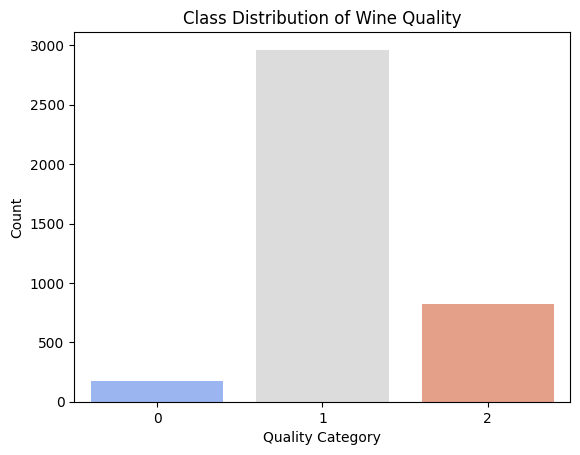

quality
1    2963
2     825
0     173
Name: count, dtype: int64


In [36]:
sns.countplot(x=df['quality'], palette='coolwarm')
plt.title("Class Distribution of Wine Quality")
plt.xlabel("Quality Category")
plt.ylabel("Count")
plt.show()

# Print value counts
print(df['quality'].value_counts())

In [37]:
from sklearn.model_selection import train_test_split

# Splitting features (X) and target variable (y)
X = df.drop(columns=['quality'])  # Feature variables
y = df['quality']  # Target variable (categorical labels)

# Splitting into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shape of the resulting sets
print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set: X_train = (3168, 11), y_train = (3168,)
Test set: X_test = (793, 11), y_test = (793,)


Correlation Matrix:
                       fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.019214     0.298959   
volatile acidity          -0.019214          1.000000    -0.163228   
citric acid                0.298959         -0.163228     1.000000   
residual sugar             0.083620          0.098340     0.106269   
chlorides                  0.024036          0.086287     0.132590   
free sulfur dioxide       -0.058396         -0.102471     0.091681   
total sulfur dioxide       0.082425          0.102315     0.122845   
density                    0.266091          0.060603     0.160076   
pH                        -0.431274         -0.046954    -0.183015   
sulphates                 -0.017453         -0.021150     0.049442   
alcohol                   -0.110788          0.046815    -0.076514   
quality                   -0.112778         -0.134616    -0.000151   

                      residual sugar  chlorides  free sulfur dioxide

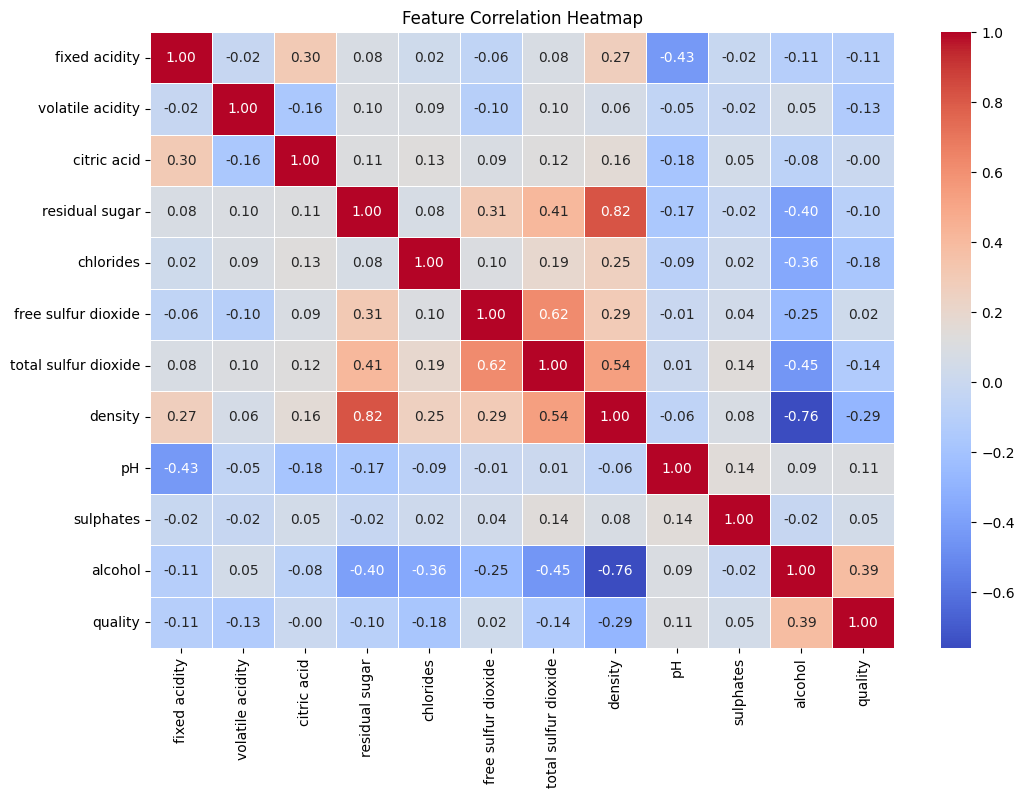

In [38]:
# Compute correlation matrix
corr_matrix = df.corr()

# Print correlation values
print("Correlation Matrix:\n", corr_matrix)

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can change n_neighbors as needed

# Training the model
knn.fit(X_train, y_train)

print("KNN Model Training Complete!")

KNN Model Training Complete!


In [41]:
# Predicting the test set results
y_pred = knn.predict(X_test)

# Displaying some predictions
print("Predicted Labels:", y_pred[:10])
print("Actual Labels:   ", y_test[:10].values)

Predicted Labels: [1 1 1 1 1 1 1 1 1 1]
Actual Labels:    [0 1 1 1 2 1 1 1 1 1]


In [42]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy of the KNN model: {accuracy:.4f}")

Accuracy of the KNN model: 0.7238


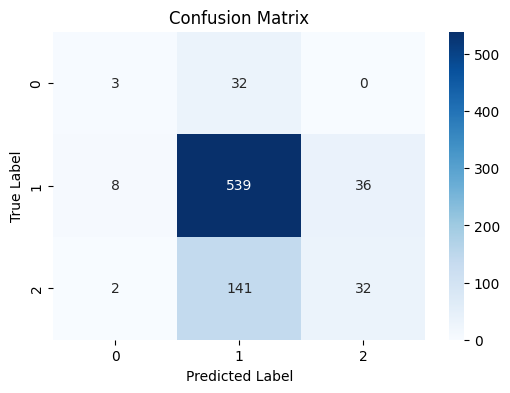

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [44]:
from sklearn.metrics import classification_report

# Assuming y_test contains true labels and y_pred contains predicted labels
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.23      0.09      0.12        35
           1       0.76      0.92      0.83       583
           2       0.47      0.18      0.26       175

    accuracy                           0.72       793
   macro avg       0.49      0.40      0.41       793
weighted avg       0.67      0.72      0.68       793



In [45]:
print(knn.n_neighbors)

5


In [64]:
# model training with feature selection applied

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np

# Recalculate VIF after removing highly correlated features
selected_features = ['fixed acidity', 'volatile acidity', 'citric acid',
                     'residual sugar', 'chlorides', 'free sulfur dioxide',
                     'total sulfur dioxide', 'sulphates']

X_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Standardize again
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_selected)
X_test_scaled = scaler.transform(X_test_selected)

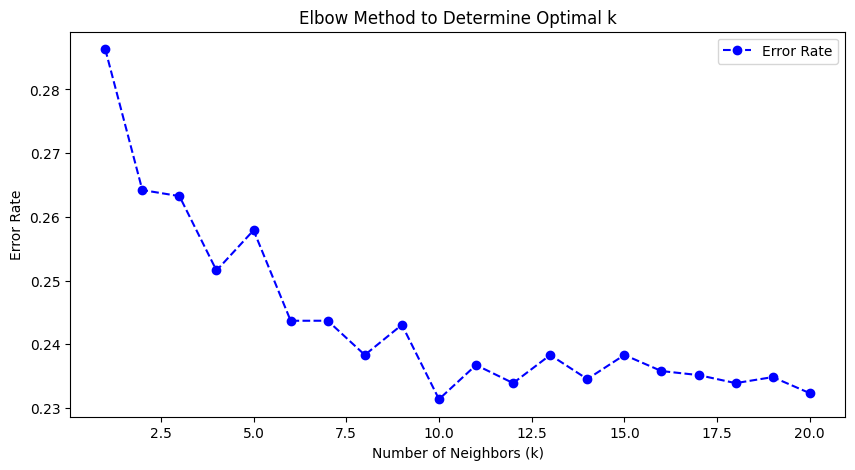

Optimal k: 10


In [61]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

error_rates = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    error_rates.append(1 - scores.mean())

# Plot elbow method
plt.figure(figsize=(10, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b', label='Error Rate')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate")
plt.title("Elbow Method to Determine Optimal k")
plt.legend()
plt.show()

# Pick the best k
optimal_k = k_values[np.argmin(error_rates)]
print(f"Optimal k: {optimal_k}")

In [62]:
knn_optimized = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance', metric='minkowski', p=2)
knn_optimized.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn_optimized.predict(X_test_scaled)

# Check accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized KNN Accuracy: {accuracy:.4f}")

Optimized KNN Accuracy: 0.7427


In [67]:
# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7427


In [68]:
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.03      0.05        35
           1       0.77      0.92      0.84       583
           2       0.56      0.29      0.38       175

    accuracy                           0.74       793
   macro avg       0.49      0.41      0.42       793
weighted avg       0.70      0.74      0.70       793



In [69]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[  1  34   0]
 [  6 538  39]
 [  0 125  50]]


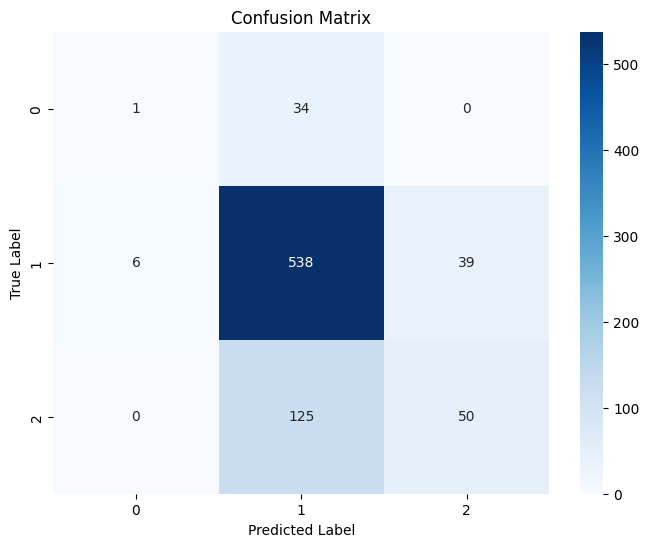

In [70]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()